# Example: Payoff and Profit of Composite Contracts at Expiration
Call and put contracts can be combined to develop composite contract structures with interesting payoff diagrams. Let's limit our focus to contracts that have the same underlying asset and the same expiration date. A composite option contract be composed of $d$ legs (individual contracts) in the contract set $\mathcal{C}$ where each leg $i\in\mathcal{C}$ is written with respect to the same underlying stock `XYZ` and has the same expiration date. Then, the overall payoff of the composite contract $\hat{V}(S(T),K_{1},\dots,K_{d})$ is given by:


$$\hat{V}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}V_{i}(S(T),K_{i})$$


where $K_{i}$ denotes the strike price of contract $i\in\mathcal{C}$. The overall profit of the composite contract $\hat{P}$ is given by:


$$\hat{P}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}P_{i}(S(T),K_{i})$$


where $\theta_{i}$ denotes the direction of contract $i$: if contract $i$ is short (sold), then $\theta_{i}=-1$, otherwise $\theta_{i}=1$, $n_{i}$ denotes the copy number of contract $i$, ${V}_{i}(S(T),K_{i})$ denotes the payoff of contract $i$, and $P_{i}(S(T),K_{i})$ denotes the profit of contract $i$. Finally, the profit for contract of type $\star$ is given by:

$$P_{\star}(K,S(T)) = {V}_{\star}(K,S(T)) -  \mathcal{P}_{\star}(K,S(0))$$

where $\mathcal{P}_{\star}(K,S(0))$ denotes the premium of contract $\star$, and ${V}_{\star}(K,S(T))$ denotes the payoff of contract $\star$ at expiration.


## Learning Objectives
For this example, we will compute the profit diagrams at expiration for some common composite contracts. We downloaded the options chain (premium value versus as a function of strike price) for [Advanced Micro Devices (AMD)](https://en.wikipedia.org/wiki/AMD) from [barchart.com](https://www.barchart.com). In this example, the share price of `AMD` is `S(0) = 117.50 USD/share`, and the average implied volatility for `AMD` options with `DTE = 31 days` is `IV = 51.75%`.

* We'll examine vertical spreads, which are defined risk trades that make bullish or bearish directional assumptions and can be opened for a credit or debit.
* Next, we'll explore long and short straddles, which are neutral trades that profit from share price movement in either direction.
* Finally, we'll analyze long and short strangles, which are another type of neutral trade that benefits from share price movement in any direction or no price movement at all.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our example problem.

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-5660-Examples-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Installed CodecBzip2 ─ v0.8.1
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
    Updating `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
  [523fee87] ↑ CodecBzip2 v0.8.0 ⇒ v0.8.1
Precompiling project...
  ✓ CodecBzip2
  ✓ MathOptInterface
  ✓ MadNLP
  ✓ JuMP
  ✓ VLQuantitativeFinancePackage
  5 dependenci

### Constants

In [2]:
Sₒ = 117.50; # set the initial share price (this has no importance now because we have the options chain data)

## Prerequisite: Load options chain dataset
To start, load the options data using using the `MyOptionsChainDataSet(...)` function and store the data in the `options_dataset` variable:

In [3]:
options_dataset = MyOptionsChainDataSet();

## Directional: Credit and Debt Vertical Spreads
[Vertical spreads](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/learning-center/Deck_Vertical-spreads.pdf), a defined risk directional strategy, involve buying and selling the same type of option with different strike prices and the same expiration date. This creates two legs, a long leg (the option purchased by the investor) and a short leg (the option sold by the investor).  The investor can use the strategy to take a position on whether the share price of the underlying stock, such as `XYZ`, will increase or decrease. 

### Bullish `put` credit spread
A `put` vertical spread is constructed by combining `2` $\times$ `put` contracts, a short `put` contract generates income while the `long` put contract controls downside risk.  Let contract $j$ have a strike price of $K_{j}$ and premium $\mathcal{P}_{j}$. The share price at expiration is given by $S$. Finally, let contract 1 be the short leg $\theta_{1} = -1$ and contract 2 be the long leg $\theta_{2} = 1$. Then, the profit for a single `put` vertical spread at expiration is given by:

$$\hat{P} = -P_{1}+P_{2}$$

which, after substitution of the profit functions for a put contract, gives:

$$
\hat{P} = \left(K_{2} - S\right)^{+} - \left(K_{1} - S\right)^{+} + \left(\mathcal{P}_{1} - \mathcal{P}_{2}\right)$$

where $V_{p} = (K-S)^{+}=\max(K-S,0)$ is the payoff function for a `put` contract. The first term is the net payout of the two legs of the spread, while the second term is the net cost of the two contracts. The maximum possible profit, loss, and breakeven conditions are given by:

* The maximum possible profit of $\left(\mathcal{P}_{1} - \mathcal{P}_{2}\right)$ will occur when $S\geq{K_{1}}$.
* The maximum possible loss of $K_{2} - K_{1} + \left(\mathcal{P}_{1} - \mathcal{P}_{2}\right)$ will occur when $S\leq{K_{2}}$.
* The vertical put spread will breakeven when $S =  K_{1}+\left(\mathcal{P}_{2} - \mathcal{P}_{1}\right)$.

Let's build a bullish put credit spread for `AMD` whose current share price is `S(0) = 117.50 USD/share`. This trade structure is constructed by selling (short) a `put` with strike $K_{1}$ and buying (long) a `put` with strike $K_{2}$, where $K_{1}<S(0)<K_{2}$. 

* Leg 1: The strike price for the `short put` leg is given by $K_{1}$ = 130 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `long put` leg is given by $K_{2}$ = 110 USD/share with `DTE = 31 days`

#### Implementation
To create a profit diagram, we first need to determine the strike prices for each trade leg (stored in the $K_{\star}$ variables). We then utilize `build(...)` methods to construct option contract models. Next, we generate an array of share prices at expiration and store them in the `S` array. Using the `profit(...)` function, we calculate the profit for each leg and the overall trade. We also determine the breakeven points for the trade using analytical expressions and plot the share price versus the profit with the help of `plot(...)` functions from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package.

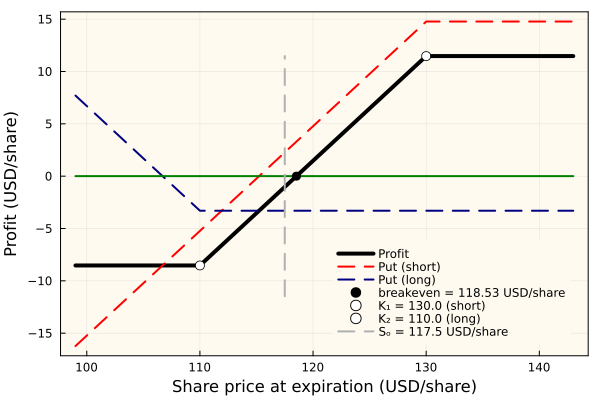

In [14]:
let

    K₁ = 130.0
    K₂ = 110.0
    premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K₁ && y == "Put"), options_dataset)[1,:Midpoint];
    premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K₂ && y == "Put"), options_dataset)[1,:Midpoint];
     
    max_loss = K₂ - K₁ + (premium_1 - premium_2);
    max_profit = (premium_1 - premium_2);
    
    put_contract_model_short = build(MyAmericanPutContractModel, (
            K = K₁, premium = premium_1, sense = -1, copy = 1
    ));

    put_contract_model_long = build(MyAmericanPutContractModel, (
            K = K₂, premium = premium_2, sense = 1, copy = 1
    ));
    
    S = range(0.9*K₂,stop = 1.1*K₁, step=0.1) |> collect;
    number_of_steps = length(S);
    BEL = zeros(length(S))
    profit_array = profit([put_contract_model_short, put_contract_model_long], S);
    breakeven = K₁ + (premium_2 - premium_1)
    
    plot(profit_array[:,1], profit_array[:,4], lw=4, label="Profit", c=:black, 
        bg="floralwhite", 	background_color_outside="white", framestyle = :box, fg_legend = :transparent)
    plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put (short)", ls=:dash, c=:red)
    plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Put (long)", ls=:dash, c=:navyblue)
    
    plot!(S,BEL,lw=2, c=:green, label="")
    scatter!([breakeven], [0], c=:black, label="breakeven = $(breakeven) USD/share", ms=5)
    scatter!([K₁],[max_profit], ms=5, label = "K₁ = $(K₁) (short)", msc=:black, mc=:white)
    scatter!([K₂],[max_loss], ms=5, label = "K₂ = $(K₂) (long)", msc=:black, mc=:white)

    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= Sₒ*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array[:,end]), stop = maximum(profit_array[:,end]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    
    xlabel!("Share price at expiration (USD/share)", fontsize=18)
    ylabel!("Profit (USD/share)", fontsize=18)
end

## Neutral: Straddles and Strangles

### Straddles
A [straddle](https://www.investopedia.com/terms/s/straddle.asp) is a _neutral strategy_ constructed by simultaneously buying (or selling) a put and a call option on the same underlying asset `XYZ`, with the _same expiration_, and the _same strike price_. Depending upon the choice of the strike prices and whether an investor buys or sells both legs, a [straddle](https://www.investopedia.com/terms/s/straddle.asp) can be initiated as a credit or debit and can potentially have undefined profit or loss.

Let $K_{j}$ denote the strike price of contract $j$ (USD/share), where the price of contract $j$ is $\mathcal{P}_{j}$ (USD/share). Finally, let index $j=1$ denote the `put` contract, $j=2$ denote the `call` contract; for a straddle $K_{1}= K_{2}\equiv{K}$ (both legs have the same strike). The profit for a single straddle contract $\hat{P}$ at expiration is given by:

$$\hat{P} = \theta\cdot\left(P_{1}+P_{2}\right)$$

where $\theta_{1}=\theta_{2}\equiv\theta$ denotes a direction parameter: $\theta=-1$ if each leg is sold (short), $\theta=1$ otherwise. After substitution of the profit functions for a `put` and a `call` contract, the overall profit $\hat{P}$ is given by:

$$\hat{P} = \theta\cdot\Bigl[(K-S)^{+}+(S-K)^{+}-(\mathcal{P}_{1}+\mathcal{P}_{2})\Bigr]$$

where $V_{p} = (K-S)^{+}=\max(K-S,0)$ is the payoff function for the `put` contract, and $V_{c} = (S-K)^{+} = \max(S-K,0)$ is the payoff function for the `call` contract. The profit (or loss) of a straddle has three regimes given by:

$$
\hat{P} = \begin{cases}
  \theta\cdot\Bigl[(S-K)-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr]  & S>K \\
  -\theta\cdot\Bigl[\mathcal{P}_{1}+\mathcal{P}_{2}\Bigr] & S=K \\
    \theta\cdot\Bigl[(K-S)-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr] & S<K
\end{cases}
$$

Finally, a straddle has _two_ possible breakeven points denoted as $S^{+}$ and $S^{-}$:
* If $S>K$: a straddle will breakeven at $S^{+} = K + \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$
* If $S<K$: a straddle will breakeven at $S^{-} = K - \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$.

#### Long straddle
For a long straddle, we purchase (are long) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `long put` leg is given by $K_{1}$ = 120 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `long call` leg is given by $K_{2}$ = 120 USD/share with `DTE = 31 days`

##### Implementation
To create a profit diagram, we first need to determine the strike prices for each trade leg (stored in the $K_{\star}$ variables). We then utilize `build(...)` methods to construct option contract models. Next, we generate an array of share prices at expiration and store them in the `S` array. Using the `profit(...)` function, we calculate the profit for each leg and the overall trade. We also determine the breakeven points for the trade using analytical expressions and plot the share price versus the profit with the help of `plot(...)` functions from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package.

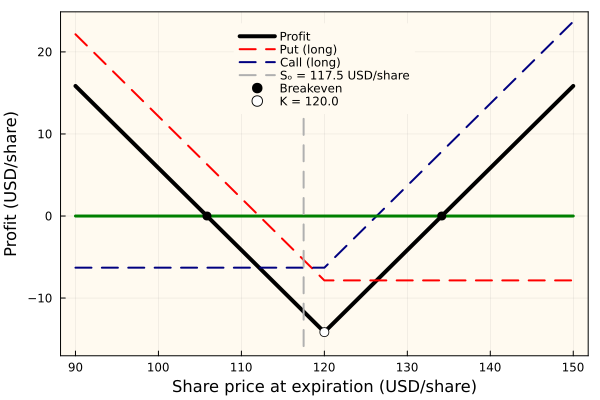

In [18]:
let
    
    K = 120.0
    premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K && y == "Put"), options_dataset)[1,:Midpoint];
    premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K && y == "Call"), options_dataset)[1,:Midpoint];

    max_loss = -1*(premium_1 + premium_2);
    
    put_contract_model = build(MyAmericanPutContractModel, (
            K = K, premium = premium_1, sense = 1, copy = 1
    ));

    call_contract_model = build(MyAmericanCallContractModel, (
            K = K, premium = premium_2, sense = 1, copy = 1
    ));
    
    S = range(90,stop = 150, step=0.1) |> collect;
    number_of_steps = length(S);
    BEL = zeros(length(S))
    profit_array = profit([put_contract_model, call_contract_model], S);
    
    breakeven_array = zeros(2,2);
    breakeven_array[1,1] = K + (premium_1 + premium_2);
    breakeven_array[2,1] = K - (premium_1 + premium_2);
    
    plot(profit_array[:,1], profit_array[:,4], lw=4, label="Profit", c=:black, 
        bg="floralwhite", 	background_color_outside="white", framestyle = :box, fg_legend = :transparent, 
        legend=:top)
    plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put (long)", ls=:dash, c=:red)
    plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Call (long)", ls=:dash, c=:navyblue)
    plot!(S,BEL,lw=3, c=:, label="")
    
    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= Sₒ*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array[:,end]), stop = maximum(profit_array[:,end]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    
    scatter!(breakeven_array[:,1], breakeven_array[:,2], c=:black, label="Breakeven", ms=5)
    scatter!([K],[max_loss], ms=5, label = "K = $(K)", msc=:black, mc=:white)
    
    xlabel!("Share price at expiration (USD/share)", fontsize=18)
    ylabel!("Profit (USD/share)", fontsize=18)
end

#### Short straddle
For a short straddle, we sell (are short) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a _short straddle_ with the parameters:

* Leg 1: The strike price for the `short put` leg is given by $K_{1}$ = `120` USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `short call` leg is given by $K_{2}$ = `120` USD/share with `DTE = 31 days`

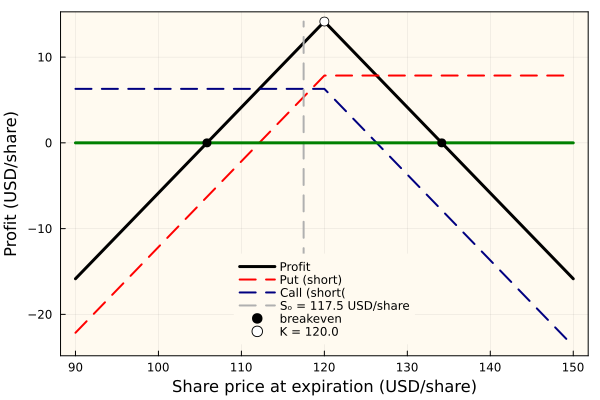

In [20]:
let 
    
    K = 120.0
    premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K && y == "Put"), options_dataset)[1,:Midpoint];
    premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K && y == "Call"), options_dataset)[1,:Midpoint];
    
    max_profit = (premium_1 + premium_2);

    put_contract_model = build(MyAmericanPutContractModel, (
            K = K, premium = premium_1, sense = -1, copy = 1
    ));

    call_contract_model = build(MyAmericanCallContractModel, (
            K = K, premium = premium_2, sense = -1, copy = 1
    ));
    
    S = range(90,stop = 150, step=0.1) |> collect;
    number_of_steps = length(S);
    BEL = zeros(length(S))
    profit_array = profit([put_contract_model, call_contract_model], S);
    
    breakeven_array = zeros(2,2);
    breakeven_array[1,1] = K + (premium_1 + premium_2);
    breakeven_array[2,1] = K - (premium_1 + premium_2);
    
    plot(profit_array[:,1], profit_array[:,4], lw=3, label="Profit", c=:black, 
        bg="floralwhite", 	background_color_outside="white", framestyle = :box, fg_legend = :transparent,
        legend=:bottom)
    plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put (short)", ls=:dash, c=:red)
    plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Call (short)", ls=:dash, c=:navyblue)
    
    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= Sₒ*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array[:,end]), stop = maximum(profit_array[:,end]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    
    plot!(S,BEL,lw=3, c=:green, label="")
    scatter!(breakeven_array[:,1], breakeven_array[:,2], c=:black, label="breakeven", ms=5)
    scatter!([K],[max_profit], ms=5, label = "K = $(K)", msc=:black, mc=:white)
    
    xlabel!("Share price at expiration (USD/share)", fontsize=18)
    ylabel!("Profit (USD/share)", fontsize=18)
end

### Strangles
A [strangle](https://www.investopedia.com/terms/s/strangle.asp) position is a _neutral strategy_ constructed by simultaneously buying or selling a put and a call option on the same underlying asset `XYZ`, with the _same expiration_ but with _different strike prices_. Depending upon the choice of the strike prices and whether an investor buys or sells both legs, a [strangle](https://www.investopedia.com/terms/s/strangle.asp) can be initiated as a credit or debit and can potentially have undefined profit or loss.

Let $K_{j}$ denote the strike price of contract $j$ (USD/share), where the price of contract $j$ is $\mathcal{P}_{j}$ (USD/share). Finally, let index $j=1$ denote the `put` contract, $j=2$ denote the `call` contract; for a strangle $K_{1}<K_{2}$. The profit for a single strangle contract $\hat{P}$ at expiration is given by:

$$\hat{P} = \theta\cdot\left(P_{1}+P_{2}\right)$$

where $\theta_{1}=\theta_{2}\equiv\theta$ denotes a direction parameter: $\theta=-1$ if each leg is sold (short), $\theta=1$ otherwise. After substitution of the profit functions for a `put` and a `call` contract, the overall profit $\hat{P}$ is given by:

$$\hat{P} = \theta\cdot\Bigl[(K_{1}-S)^{+}+(S-K_{2})^{+}-(\mathcal{P}_{1}+\mathcal{P}_{2})\Bigr]$$

where $V_{p} = (K_{1}-S)^{+}=\max(K_{1}-S,0)$ is the `payoff` for the `put` contract, and $V_{c} = (S-K_{2})^{+} = \max(S-K_{2},0)$ is the `payoff` for the `call` contract. The profit (or loss) of a strangle has three regimes given by:

$$
\hat{P} = \begin{cases}
  \theta\cdot\Bigl[(S-K_{2})-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr]  & S>K_{2} \\
  -\theta\cdot\Bigl[\mathcal{P}_{1}+\mathcal{P}_{2}\Bigr] & K_{1}\leq{S}\leq{K_{2}} \\
  \theta\cdot\Bigl[(K_{1}-S)-\left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)\Bigr] & S<{K_{1}}
\end{cases}
$$

A [strangle](https://www.investopedia.com/terms/s/strangle.asp) has two break-even points $S^{+}$ and $S^{-}$ where $K_{2}<S^{+}$ and $S^{-}<K_{1}$. The low break-even point $S^{-}$ is given by:

$$S^{-} = K_{1} - \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$$

while the high break-even point $S^{+}$ is given by:

$$S^{+} = K_{2} + \left(\mathcal{P}_{1}+\mathcal{P}_{2}\right)$$

#### Long strangle
For a long strangle, we purchase (are long) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Opening this trade results in a `debit`, where the investor profits when the trade is closed. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `long put` leg is given by $K_{1}$ = 105 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `long call` leg is given by $K_{2}$ = 135 USD/share with `DTE = 31 days`

##### Implementation
To create a profit diagram, we first need to determine the strike prices for each trade leg (stored in the $K_{\star}$ variables). We then utilize `build(...)` methods to construct option contract models. Next, we generate an array of share prices at expiration and store them in the `S` array. Using the `profit(...)` function, we calculate the profit for each leg and the overall trade. We also determine the breakeven points for the trade using analytical expressions and plot the share price versus the profit with the help of `plot(...)` functions from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package.

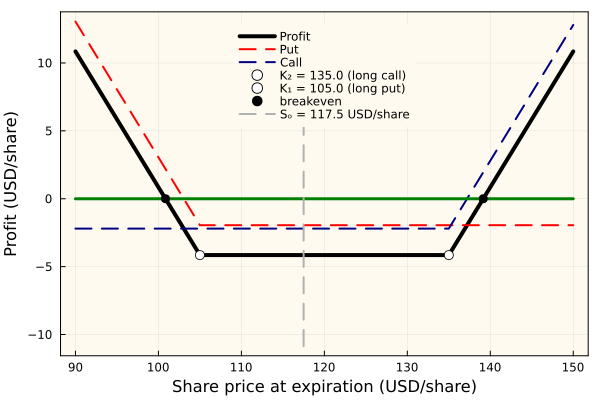

In [21]:
let

    K₁ = 105.0;
    K₂ = 135.0;
    premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K₁ && y == "Put"), options_dataset)[1,:Midpoint];
    premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K₂ && y == "Call"), options_dataset)[1,:Midpoint];
    
    max_loss = -1*(premium_1 + premium_2);
    
    put_contract_model = build(MyAmericanPutContractModel, (
            K = K₁, premium = premium_1, sense = 1, copy = 1
    ));

    call_contract_model = build(MyAmericanCallContractModel, (
            K = K₂, premium = premium_2, sense = 1, copy = 1
    ));
    
    S = range(90,stop = 150, step=0.1) |> collect;
    number_of_steps = length(S);
    BEL = zeros(length(S))
    profit_array = profit([put_contract_model, call_contract_model], S);
    
    breakeven_array = zeros(2,2);
    breakeven_array[1,1] = K₂ + (premium_1 + premium_2);
    breakeven_array[2,1] = K₁ - (premium_1 + premium_2);
    
    plot(profit_array[:,1], profit_array[:,4], lw=4, label="Profit", c=:black, 
        bg="floralwhite", 	background_color_outside="white", framestyle = :box, fg_legend = :transparent, 
        legend = :top)
    plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put", ls=:dash, c=:red)
    plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Call", ls=:dash, c=:navyblue)
    
    scatter!([K₂],[max_loss], ms=5, label = "K₂ = $(K₂) (long call)", msc=:black, mc=:white)
    scatter!([K₁],[max_loss], ms=5, label = "K₁ = $(K₁) (long put)", msc=:black, mc=:white)
    
    plot!(S,BEL,lw=3, c=:green, label="")
    scatter!(breakeven_array[:,1], breakeven_array[:,2], c=:black, label="breakeven", ms=5)
    
    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= Sₒ*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array[:,end]), stop = maximum(profit_array[:,end]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    
    xlabel!("Share price at expiration (USD/share)", fontsize=18)
    ylabel!("Profit (USD/share)", fontsize=18)
end

#### Short strangle
For a short strangle, we sell (are short) both the `put` and the `call` contracts in the straddle, thus $\theta = 1$. Let's contruct the profit diagram for a long straddle with the parameters:

* Leg 1: The strike price for the `short put` leg is given by $K_{1}$ = 105 USD/share with `DTE = 31 days`
* Leg 2: The strike price for the `short call` leg is given by $K_{2}$ = 135 USD/share with `DTE = 31 days`

##### Implementation
To create a profit diagram, we first need to determine the strike prices for each trade leg (stored in the $K_{\star}$ variables). We then utilize `build(...)` methods to construct option contract models. Next, we generate an array of share prices at expiration and store them in the `S` array. Using the `profit(...)` function, we calculate the profit for each leg and the overall trade. We also determine the breakeven points for the trade using analytical expressions and plot the share price versus the profit with the help of `plot(...)` functions from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package.

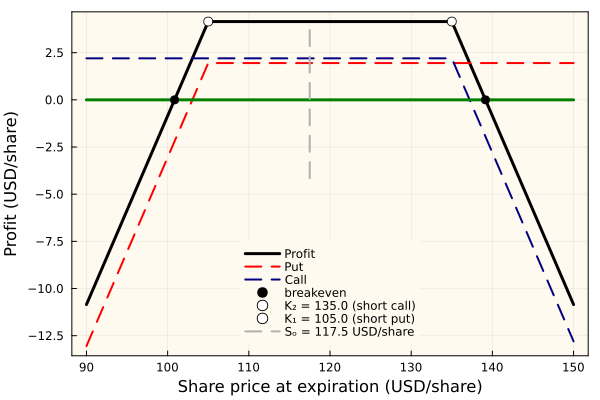

In [22]:
let

    K₁ = 105.0;
    K₂ = 135.0;
    premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K₁ && y == "Put"), options_dataset)[1,:Midpoint];
    premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K₂ && y == "Call"), options_dataset)[1,:Midpoint];
    
    max_profit = (premium_1 + premium_2);
    
    put_contract_model = build(MyAmericanPutContractModel, (
            K = K₁, premium = premium_1, sense = -1, copy = 1
    ));

    call_contract_model = build(MyAmericanCallContractModel, (
            K = K₂, premium = premium_2, sense = -1, copy = 1
    ));
    
    S = range(90,stop = 150, step=0.1) |> collect;
    number_of_steps = length(S);
    BEL = zeros(length(S))
    profit_array = profit([put_contract_model, call_contract_model], S);
    
    breakeven_array = zeros(2,2);
    breakeven_array[1,1] = K₂ + (premium_1 + premium_2);
    breakeven_array[2,1] = K₁ - (premium_1 + premium_2);
    
    plot(profit_array[:,1], profit_array[:,4], lw=3, label="Profit", c=:black, 
    bg="floralwhite", 	background_color_outside="white", framestyle = :box, fg_legend = :transparent,
    legend=:bottom)
    plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put", ls=:dash, c=:red)
    plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Call", ls=:dash, c=:navyblue)
    
    plot!(S,BEL,lw=3, c=:green, label="")
    scatter!(breakeven_array[:,1], breakeven_array[:,2], c=:black, label="breakeven", ms=5)
    
    scatter!([K₂],[max_profit], ms=5, label = "K₂ = $(K₂) (short call)", msc=:black, mc=:white)
    scatter!([K₁],[max_profit], ms=5, label = "K₁ = $(K₁) (short put)", msc=:black, mc=:white)
    
    VLINE = zeros(number_of_steps, 2)
    VLINE[:,1] .= Sₒ*ones(number_of_steps)
    VLINE[:,2] .= range(minimum(-1*profit_array[:,end]), stop = maximum(profit_array[:,end]), length = number_of_steps) |> collect;
    plot!(VLINE[:,1], VLINE[:,2], lw=2, c= :gray69, ls=:dash, label="Sₒ = $(Sₒ) USD/share")
    
    xlabel!("Share price at expiration (USD/share)", fontsize=18)
    ylabel!("Profit (USD/share)", fontsize=18)
end

## Disclaimer and Risks

__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team.

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.